In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("income.csv")

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

Text(0, 0.5, 'Income($)')

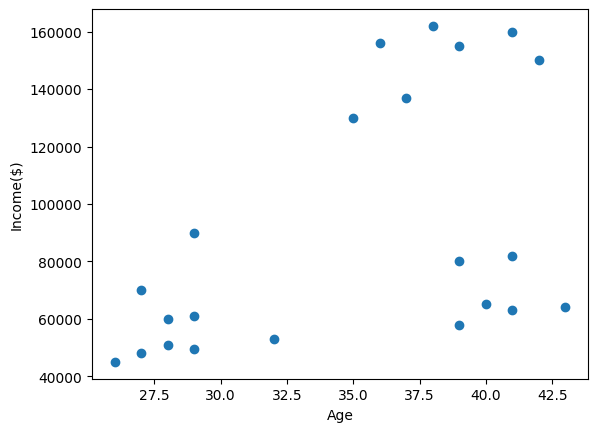

In [12]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

By the above visualization I can say that there are 3 clusters present.

But still to verify the  perfect k(no. of centroids) value I will use Elbow Method later.

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters = 3)

In [16]:
y_pred = model.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [17]:
df['cluster'] = y_pred

In [19]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [20]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

In [24]:
df1.head()

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0


Text(0, 0.5, 'Income($)')

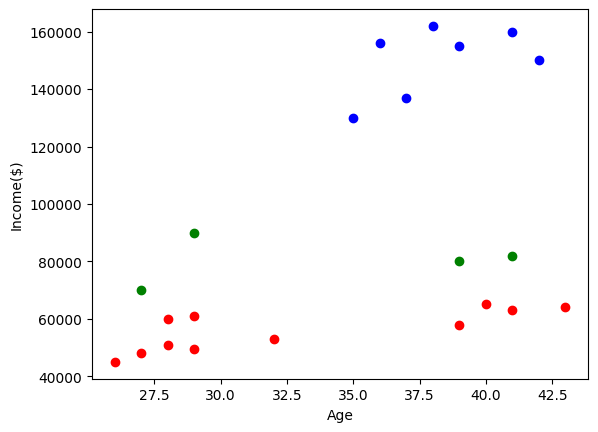

In [29]:
plt.scatter(df1['Age'],df1['Income($)'],color = 'red')
plt.scatter(df2['Age'],df2['Income($)'],color = 'blue')
plt.scatter(df3['Age'],df3['Income($)'],color = 'green')
plt.xlabel('Age')
plt.ylabel('Income($)')

In the above visual we can see that it has not properly classified, becuase the scaling here is not proper.

So we haeve to do some preprocessing .

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [35]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [37]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [38]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [39]:
y_pred = model.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [40]:
df['cluster'] = y_pred

In [41]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [42]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

In [52]:
model.inertia_  # sum of squared error for k = 3.

0.4750783498553096

In [44]:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income($)')

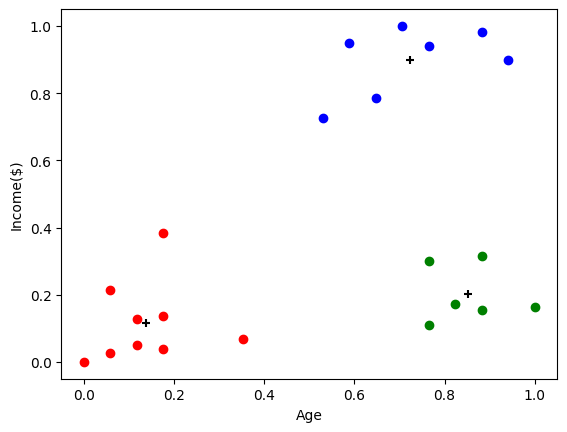

In [49]:
plt.scatter(df1['Age'],df1['Income($)'],color = 'red')
plt.scatter(df2['Age'],df2['Income($)'],color = 'blue')
plt.scatter(df3['Age'],df3['Income($)'],color = 'green')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color = "black", marker = '+')
plt.xlabel('Age')
plt.ylabel('Income($)')

So now I got the perfect classifications after the proper scaling.

So even though we know that the 'k' value we have taken is correct, let's check that by the Elbow Method

In [50]:
k_range = range(1,11)
sse = []

In [54]:
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'SSE')

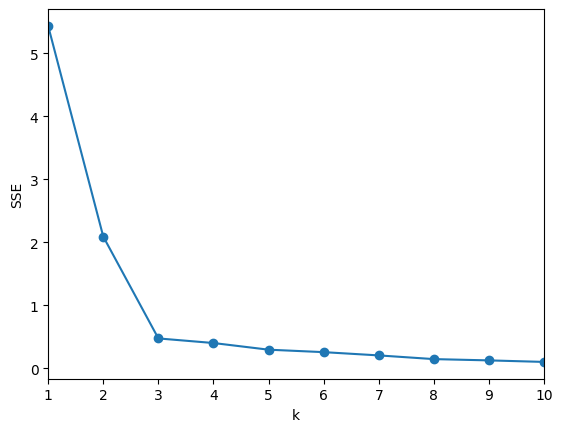

In [66]:
plt.plot(k_range,sse)
plt.scatter(k_range,sse)
plt.xlim(1,10) # just to see the exact value of k.
plt.xlabel('k')
plt.ylabel('SSE')

So from the above visual, we can say that the 'k' value is '3' a the Elbow comes at '3'